<a href="https://colab.research.google.com/github/chaeyoung97/google-CoLab/blob/master/MNIST_keras_(with_comment).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST DATASET 불러오기

In [0]:
#import the mnist dataset
from keras.datasets import mnist

#load train data & test data 
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_text: ", x_test.shape)
print("y_test: ",y_test.shape)

x_train:  (60000, 28, 28)
y_train:  (60000,)
x_text:  (10000, 28, 28)
y_test:  (10000,)


#DATA Visualization

Sample Data from the test set: 
Lable:  9


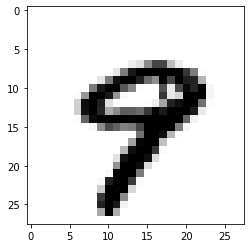

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

print("Sample Data from the test set: ")
#plt.imshow(x_test[9].reshape(28,28)) #컬러 출력
plt.imshow(x_test[9].reshape(28,28), cmap="Greys")  #cmap = "Greys"로 흑백 출력
print("Lable: ", y_test[9])

#DATA Preprocessing & DATA Normalization

In [0]:
#reshaping  data format
# a nunmber of data sample * 28 * 28 * 1(channel)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

#convert data to float to do the division operation
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#feature scaling to avoid overfitting and to fast convergence of function
#cnn converg faster on[0-1]data than on [0-255]
x_train /= 255
x_test /= 255     # 0~1사이의 실수

#BUILDING THE CNN




In [0]:
#import the keras packages that we need
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

#set the CNN model
model = models.Sequential()

In [0]:
###Convolultion###
#32 : convolution filters 수
#(3,3) : convolution kernel(행, 열)
#input_shape : 입력형태 (모델의 첫 레이어에서만 정의하면 됨 나머지 레이어는 그 전 레이어의 output이 input으로 들어와서 input_shape정할 필요 없음) 

###activation function###
#relu : hidden layer에 주로 사용 (avoid negative value)
#sigmoid : 이진 분류 문제에서 output layer에 주로 사용(binaty classification)
#softmax : 다중 클래스 분류에서 output layer에 주로 사용(multi class classification)


#CNN architecture is in [[convolution2D->relu]*2 -> [MaxPooling]]*2 -> [Flatten] -> [Dense->relu]*2 -> [Dense->softmax]

model.add(layers.Convolution2D(32, (5,5), input_shape= (28, 28, 1), activation = "relu"))
model.add(layers.Convolution2D(32, (5,5), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))

model.add(layers.Convolution2D(64, (3,3), activation='relu'))
model.add(layers.Convolution2D(64, (3,3), activation = 'relu'))
model.add(layers.Dropout(0.5)) # 50% drop
model.add(layers.MaxPooling2D(pool_size = (2,2)))

#Flattening (spatioal information)
model.add(layers.Flatten())
#Full connected layer
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3)) # 30% drop
model.add(layers.Dense(64,  activation='relu'))
model.add(layers.Dense(10,  activation='sigmoid'))

In [0]:
#metrics : 모델 평가 지표
#loss : loss  function  여기선 다중 클래스 문제이므로 categorical_crossentropy(for multi class)사용함
#optimizer : 최적의 가중치를 찾는데 사용되는 최적화 알고리즘 (경사 하강법 알고리즘 중 하나인 adam사용)
model.compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [0]:

model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 20, 20, 32)        25632     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 6, 6, 64)          36928     
_________________________________________________________________
dropout_17 (Dropout)         (None, 6, 6, 64)          0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 3, 3, 64)        

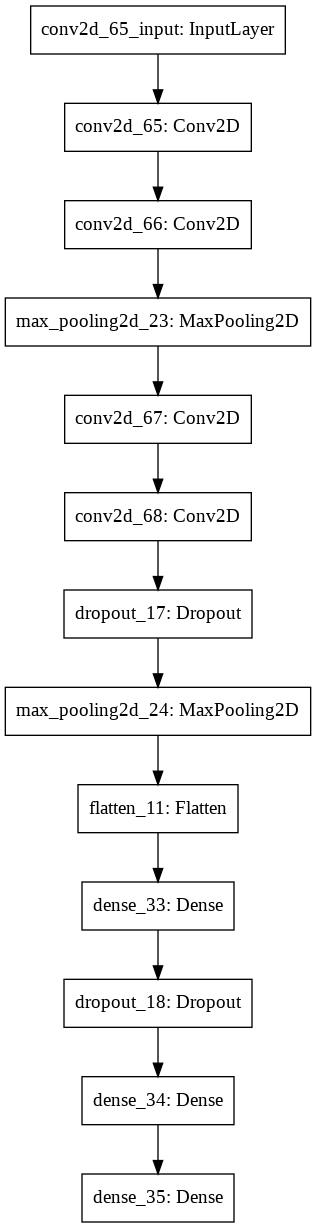

In [0]:
from IPython.display import SVG
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png')

In [0]:
#epochs : iteration
history = model.fit(x = x_train, y = y_train, epochs =20)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1728 - accuracy: 0.9457
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0608 - accuracy: 0.9821
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0509 - accuracy: 0.9849
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0397 - accuracy: 0.9882
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0358 - accuracy: 0.9900
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0334 - accuracy: 0.9905
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0298 - accuracy: 0.9914
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0285 - accuracy: 0.9915
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0236 - accuracy: 0.9930
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.025

In [0]:
#Evaluating the classifier
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("test accuracy: ",test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0211 - accuracy: 0.9938
test accuracy:  0.9937999844551086


#시각화 VISUALIZATION

In [0]:
print(history.history.keys())
#loss: 매 epoch마다의 훈련 손실 값
#acc: 매 epoch마다의 훈련 정확도

dict_keys(['loss', 'accuracy'])


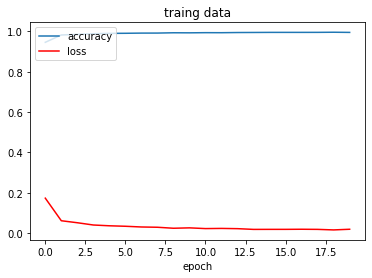

In [0]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'], 'r')
plt.title("traing data")
plt.xlabel('epoch')
plt.legend(['accuracy','loss'], loc = 'upper left')
plt.show()

In [0]:
'''
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes = True).create(prog='dot', format='svg'))

CNN 모델의 구조를 좀 더 보기 편하게 가시화하는 코드인데 일단 현재는 에러뜸 
'''